In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
dataset = pd.read_csv("FuelConsumption.csv")

In [3]:
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
dataset.isnull().any()

MODELYEAR                   False
MAKE                        False
MODEL                       False
VEHICLECLASS                False
ENGINESIZE                  False
CYLINDERS                   False
TRANSMISSION                False
FUELTYPE                    False
FUELCONSUMPTION_CITY        False
FUELCONSUMPTION_HWY         False
FUELCONSUMPTION_COMB        False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
dtype: bool

In [5]:
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
dataset['MAKE'].nunique()

39

In [8]:
dataset['MODEL'].nunique()

663

In [9]:
dataset['VEHICLECLASS'].nunique()

16

In [10]:
dataset['TRANSMISSION'].nunique()

22

In [11]:
dataset['FUELTYPE'].nunique()

4

In [12]:
dataset["MODELYEAR"].nunique()

1

In [13]:
temp=dataset.corr()
temp

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [14]:
tmp=dataset.corr()
imp_cols = tmp[abs(tmp['CO2EMISSIONS']) > 0.5].index.tolist()
imp_cols

['ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

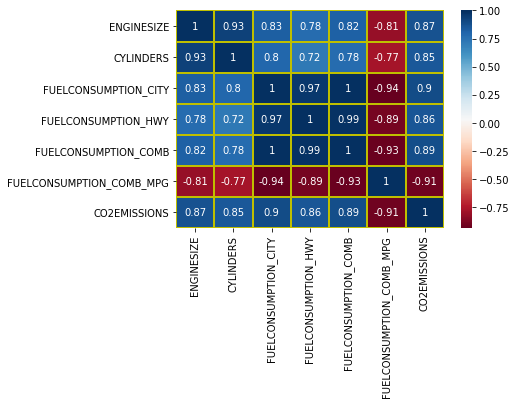

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(dataset[imp_cols].corr(),cmap='RdBu',annot=True,linewidths=1,linecolor='y')
# sns.savefig("output.png")

In [16]:
# sns.pairplot(dataset, kind="reg")
# plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['MAKE'] = le.fit_transform(dataset['MAKE'])
dataset['VEHICLECLASS'] = le.fit_transform(dataset['VEHICLECLASS'])
dataset['TRANSMISSION'] = le.fit_transform(dataset['TRANSMISSION'])
dataset['FUELTYPE'] = le.fit_transform(dataset['FUELTYPE'])

In [18]:
x = dataset.iloc[:,[4,5,6,7,8,9,10,11]].values

In [19]:
y = dataset.iloc[:,12:13].values

In [20]:
y.shape

(1067, 1)

In [21]:
x.shape

(1067, 8)

In [22]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
z = one.fit_transform(x[:,3:4]).toarray()
x= np.delete(x,[3],axis =1)
x= np.concatenate((z,x),axis =1)

In [38]:
x.shape

(1067, 11)

In [24]:
y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rdr = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',random_state = 50)

In [28]:
rdr.fit(x_train,y_train)

E:\New folder\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [29]:
threshold=dataset['CO2EMISSIONS'].mean()

In [30]:
threshold

256.2286785379569

In [31]:
pickle.dump(rdr,open('carco2.pkl','wb'))

In [32]:
yrdr =rdr.predict(x_test)

In [33]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,yrdr)


In [34]:
accuracy

0.9827459793045704

In [35]:
# from sklearn.metrics import confusion_matrix
# cm1 = confusion_matrix(y_test,yrdr)

In [36]:
yrdr

array([175, 260, 267, 230, 237, 269, 380, 336, 278, 255, 223, 278, 182,
       359, 205, 308, 338, 317, 334, 267, 216, 193, 278, 246, 209, 242,
       159, 175, 198, 196, 209, 239, 168, 207, 227, 230, 248, 214, 304,
       290, 262, 315, 223, 260, 327, 297, 260, 232, 377, 380, 260, 258,
       278, 338, 189, 179, 198, 193, 290, 237, 356, 209, 336, 329, 248,
       196, 380, 221, 260, 223, 209, 214, 317, 253, 359, 230, 338, 225,
       207, 225, 196, 166, 290, 317, 344, 304, 189, 225, 237, 283, 186,
       278, 373, 230, 184, 414, 191, 184, 214, 308, 225, 248, 297, 258,
       225, 267, 255, 246, 166, 306, 250, 177, 202, 223, 262, 322, 230,
       237, 237, 258, 290, 278, 258, 290, 259, 212, 380, 138, 246, 207,
       294, 216, 200, 255, 147, 255, 267, 251, 189, 212, 198, 308, 184,
       310, 207, 232, 239, 272, 380, 432, 334, 269, 228, 285, 196, 411,
       186, 221, 186, 239, 248, 373, 184, 304, 336, 336, 175, 126, 432,
       304, 317, 292, 168, 198, 110, 407, 269, 255, 209, 317, 41

In [37]:
y_test

array([[175],
       [264],
       [267],
       [230],
       [239],
       [276],
       [396],
       [334],
       [278],
       [258],
       [225],
       [283],
       [182],
       [366],
       [205],
       [308],
       [338],
       [320],
       [344],
       [274],
       [218],
       [193],
       [195],
       [246],
       [209],
       [244],
       [159],
       [175],
       [198],
       [196],
       [209],
       [242],
       [166],
       [207],
       [224],
       [232],
       [294],
       [216],
       [306],
       [294],
       [258],
       [320],
       [225],
       [262],
       [334],
       [301],
       [264],
       [275],
       [380],
       [380],
       [262],
       [262],
       [283],
       [338],
       [191],
       [179],
       [198],
       [193],
       [294],
       [237],
       [359],
       [209],
       [340],
       [338],
       [251],
       [196],
       [382],
       [221],
       [262],
       [225],
       [209],
      